In [1]:
import pandas as pd
import nltk.corpus
import re
import string
import spacy


In [2]:
df = pd.read_csv('pre-processed.csv',sep=';')
df = df[['preprocessed_news','label']]
df = df.dropna()
df['label'] = df['label'].astype(int)
df

,preprocessed_news,label
0,katia abreu diz vai colocar expulsao moldura n...,0
1,ray peita bolsonaro conservador fake entrevist...,0
2,reinaldo azevedo desmascarado policia federal ...,0
3,relatorio assustador bndes mostra dinheiro pub...,0
4,radialista americano fala sobre pt vendem ilus...,0
...,...,...
7196,jornal britanico acao contra lula lava jato se...,1
7197,temer diz acionou pf cade investigar aumentos ...,1
7198,obstaculos politicos temer especialistas ouvid...,1
7199,setembro boa noite aqui estao principais notic...,1


In [3]:
stopwords_br = nltk.corpus.stopwords.words('portuguese')
stopwords_br

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [4]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [5]:
nlp = spacy.load('pt_core_news_sm')

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

In [6]:
df['preprocessed_news'] = df['preprocessed_news'].apply(wordopt)
df['preprocessed_news'] = df['preprocessed_news'].apply(lemmatize_text)
#CORPUS NÃO PRECISA TRATAR AS STOPWORDS
#df['preprocessed_news'] = df['preprocessed_news'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_br]))
df

,preprocessed_news,label
0,katia abrer dizer ir colocar expulsao moldura ...,0
1,Ray peito bolsonaro conservador Fake Entrevist...,0
2,reinaldo azevedo desmascarar policia federal f...,0
3,relatorio assustador bnde mostrar dinheiro pub...,0
4,radialista americano falar sobre pt vender ilu...,0
...,...,...
7196,jornal britanico acao contra Lula lava jato se...,1
7197,temer dizer acionar pf cade investigar aumento...,1
7198,obstaculo politico temer especialista ouvir av...,1
7199,setembro bom noite aqui estao principal notici...,1


In [7]:
df2 = pd.read_excel('FakeRecogna.xlsx')
df2 = df2[['Noticia','Classe']]
df2 = df2.dropna()
df2['Classe'] = df2['Classe'].astype(int)
df2

,Noticia,Classe
0,apagão vaticano papar presar acusação tráfico ...,0
1,o governar equador anunciar preparar cova cole...,1
2,o companhia air france operar voar direto pequ...,1
3,o marfrig global foods retomar vender carnar b...,1
4,o assunto voltar o compartilhar rede social ju...,0
...,...,...
11898,argentino marcar tendência mundial vacinar o c...,0
11899,o ministrar saudar marcelo queiroga e represen...,1
11900,o vídeo recentemente publicar página “ 18:18 ”...,0
11901,parir afp o frança impor tocar recolher o 20h ...,1


In [8]:
#FAKERECOGNA NÃO PRECISA TRATAR LEMATIZAR
df2['Noticia'] = df2['Noticia'].apply(wordopt)
df2['Noticia'] = df2['Noticia'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_br]))
df2

,Noticia,Classe
0,apagão vaticano papar presar acusação tráfico ...,0
1,governar equador anunciar preparar cova coleti...,1
2,companhia air france operar voar direto pequim...,1
3,marfrig global foods retomar vender carnar bov...,1
4,assunto voltar compartilhar rede social julho ...,0
...,...,...
11898,argentino marcar tendência mundial vacinar car...,0
11899,ministrar saudar marcelo queiroga representant...,1
11900,vídeo recentemente publicar página facebook ar...,0
11901,parir afp frança impor tocar recolher locar en...,1


In [9]:
df = df.rename(columns={'preprocessed_news':'Noticia'})
df

,Noticia,label
0,katia abrer dizer ir colocar expulsao moldura ...,0
1,Ray peito bolsonaro conservador Fake Entrevist...,0
2,reinaldo azevedo desmascarar policia federal f...,0
3,relatorio assustador bnde mostrar dinheiro pub...,0
4,radialista americano falar sobre pt vender ilu...,0
...,...,...
7196,jornal britanico acao contra Lula lava jato se...,1
7197,temer dizer acionar pf cade investigar aumento...,1
7198,obstaculo politico temer especialista ouvir av...,1
7199,setembro bom noite aqui estao principal notici...,1


In [10]:
df2 = df2.rename(columns={'Classe':'label'})
df2

,Noticia,label
0,apagão vaticano papar presar acusação tráfico ...,0
1,governar equador anunciar preparar cova coleti...,1
2,companhia air france operar voar direto pequim...,1
3,marfrig global foods retomar vender carnar bov...,1
4,assunto voltar compartilhar rede social julho ...,0
...,...,...
11898,argentino marcar tendência mundial vacinar car...,0
11899,ministrar saudar marcelo queiroga representant...,1
11900,vídeo recentemente publicar página facebook ar...,0
11901,parir afp frança impor tocar recolher locar en...,1


In [11]:
base = pd.concat([df,df2])
base

,Noticia,label
0,katia abrer dizer ir colocar expulsao moldura ...,0
1,Ray peito bolsonaro conservador Fake Entrevist...,0
2,reinaldo azevedo desmascarar policia federal f...,0
3,relatorio assustador bnde mostrar dinheiro pub...,0
4,radialista americano falar sobre pt vender ilu...,0
...,...,...
11898,argentino marcar tendência mundial vacinar car...,0
11899,ministrar saudar marcelo queiroga representant...,1
11900,vídeo recentemente publicar página facebook ar...,0
11901,parir afp frança impor tocar recolher locar en...,1


# TREINAMENTO 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

X = base['Noticia']
y = base['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
len(X)

19102

In [32]:
len(y)

19102

# BAG OF WORDS 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

In [14]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

c:\Users\vande\anaconda3\envs\article\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9256739073540958

In [15]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1882
           1       0.94      0.91      0.93      1939

    accuracy                           0.93      3821
   macro avg       0.93      0.93      0.93      3821
weighted avg       0.93      0.93      0.93      3821



In [16]:
NB = MultinomialNB()
NB.fit(xv_train,y_train)
pred_NB=NB.predict(xv_test)
NB.score(xv_test, y_test)

0.6558492541219576

In [17]:
print(classification_report(y_test, pred_NB))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      1882
           1       0.69      0.58      0.63      1939

    accuracy                           0.66      3821
   macro avg       0.66      0.66      0.65      3821
weighted avg       0.66      0.66      0.65      3821



# TESTANDO BASE NOTICIAS AFP - SOMENTE FALSAS

In [39]:
teste = pd.read_excel('noticias.xlsx')
teste['noticia'] = teste['noticia'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_br]))
teste

,noticia,label
0,"“Presidente Estados Unidos. premiado camisa, b...",fake
1,“MARÍLIA GABRIELA INDIGNADA. Caramba. Mulher c...,fake
2,“Nunca Bolsonaro perdeu eleição.Um ex presiden...,fake
3,"“Após adesão Finlândia OTAN fronteira Vyborg ,...",fake
4,"“Estados Unidos, rompem relação Brasil enquant...",fake
...,...,...
960,“A melhor parte reunião: ‘Se precisar apoio pe...,fake
961,“Essa casa João Doria”,fake
962,"“A convite Helder, Mandetta chega Belém reforç...",fake
963,"“Já sabia, brasileiro gosta traíra”",fake


In [21]:
def manual_testing2(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)

    nlp = spacy.load('pt_core_news_sm')
    doc = nlp(new_def_test["text"].iloc[0])
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    new_x_test = [lemmatized_text]
    
    #new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_NB = NB.predict(new_xv_test)
   

    return pred_LR

In [38]:
fake = 0
true = 0

for i in teste['noticia']:
    x = manual_testing2(i)
    if x == 0:
        print('Fake News')
        fake += 1
    else:
        print('Not a Fake News')
        true += 1

print('Fake: ',fake)
print('True: ',true)

Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fa

In [61]:
def manual_testing3(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)

    nlp = spacy.load('pt_core_news_sm')
    doc = nlp(new_def_test["text"].iloc[0])
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    new_x_test = [lemmatized_text]
    
    #new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    #pred_LR = LR.predict(new_xv_test)
    pred_NB = NB.predict(new_xv_test)
   

    return pred_NB

In [62]:
fake = 0
true = 0

for i in teste['noticia']:
    x = manual_testing3(i)
    if x == 0:
        print('Fake News')
        fake += 1
    else:
        print('Not a Fake News')
        true += 1

print('Fake: ',fake)
print('True: ',true)

Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News


In [47]:
new = input('Digite a noticia: ')
print(manual_testing2(new))
print(manual_testing3(new))

[0]
[1]


: 

# TESTANDO NOTÍCIAS BASE UOL - SOMENTE VERDADEIRAS

In [23]:
teste_true = pd.read_excel('noticias-true.xlsx')
teste_true = teste_true[['noticia','label']]
teste_true['noticia'] = teste_true['noticia'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_br]))
teste_true

,noticia,label
0,"['O líder União Brasil Câmara, Elmar Nasciment...",True
1,['Escolhido dedo todo-poderoso xará Arthur Lir...,True
2,"['O advogado Cristiano Zanin defendeu que, cas...",True
3,"['Luciano Ferreira Cavalcante, ex-assessor Art...",True
4,['Um dia antes TSE (Tribunal Superior Eleitora...,True
...,...,...
908,['O presidente Luiz Inácio Lula Silva deve esc...,True
909,['O ex-deputado federal Deltan Dallagnol (Pode...,True
910,['A CPI MST reuniu terceira vez hoje votar req...,True
911,['O presidente Lula (PT) preteriu duas mulhere...,True


In [24]:
fake = 0
true = 0

for i in teste_true['noticia']:
    x = manual_testing2(i)
    if x == 0:
        print('Fake News')
        fake += 1
    else:
        print('Not a Fake News')
        true += 1

print('Fake: ',fake)
print('True: ',true)

Not a Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Not a Fake News
Not a Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
No

In [63]:
fake = 0
true = 0

for i in teste_true['noticia']:
    x = manual_testing3(i)
    if x == 0:
        print('Fake News')
        fake += 1
    else:
        print('Not a Fake News')
        true += 1

print('Fake: ',fake)
print('True: ',true)

Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Not a Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Fake News
Not a Fake News
Fake

In [43]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''NB = MultinomialNB()
NB.fit(xv_train,y_train)
pred_NB=NB.predict(xv_test)
NB.score(xv_test, y_test)'''

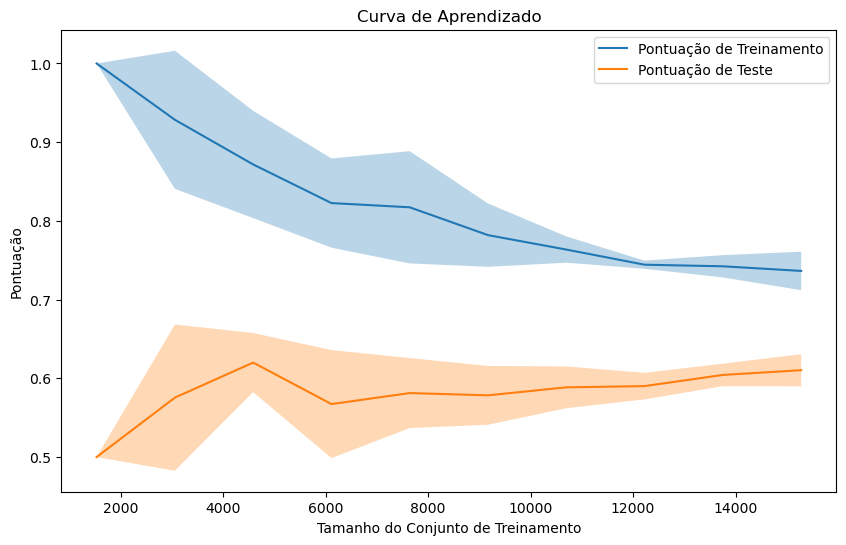

In [55]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)


train_sizes, train_scores, test_scores = learning_curve(
    NB, X_vectorized, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcula a média e desvio padrão das pontuações de treinamento e teste
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plota a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Pontuação de Treinamento')
plt.plot(train_sizes, test_scores_mean, label='Pontuação de Teste')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação')
plt.title('Curva de Aprendizado')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import accuracy_score

# Dividir os dados em conjuntos de treinamento e teste
X = base['Noticia']
y = base['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Vetorizar os dados de texto
vectorizer = CountVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

# Criar e treinar o modelo de regressão logística
LR = LogisticRegression(C=0.1)
LR.fit(xv_train, y_train)

# Realizar predições no conjunto de treinamento e teste
train_predictions = LR.predict(xv_train)
test_predictions = LR.predict(xv_test)

# Calcular a acurácia do modelo
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Acurácia no conjunto de treinamento:", train_accuracy)
print("Acurácia no conjunto de teste:", test_accuracy)

Acurácia no conjunto de treinamento: 0.9863883253713762
Acurácia no conjunto de teste: 0.9369275058885108


c:\Users\vande\anaconda3\envs\article\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn.model_selection import cross_val_score

X = base['Noticia']
y = base['label']

vectorizer = CountVectorizer()
xv = vectorizer.fit_transform(X)



# Realiza a validação cruzada com 5 folds
scores = cross_val_score(NB, xv, y, cv=5)

print("Acurácia média: {:.2f}".format(scores.mean()))
print("Acurácia por fold: ", scores)

Acurácia média: 0.61
Acurácia por fold:  [0.57236326 0.61031144 0.63219895 0.61675393 0.61963351]


In [57]:
# TREINAMENTO

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB

X = base['Noticia']
y = base['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

vectorizer = CountVectorizer(binary=True)
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

NB = BernoulliNB()
NB.fit(xv_train, y_train)
pred_NB = NB.predict(xv_test)
accuracy = NB.score(xv_test, y_test)

print(classification_report(y_test, pred_NB))
print("Accuracy:", accuracy)



              precision    recall  f1-score   support

           0       0.60      0.93      0.73      1887
           1       0.85      0.41      0.55      1934

    accuracy                           0.66      3821
   macro avg       0.73      0.67      0.64      3821
weighted avg       0.73      0.66      0.64      3821

Accuracy: 0.6631771787490186


In [59]:
# TREINAMENTO

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB

X = base['Noticia']
y = base['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

vectorizer = CountVectorizer(binary=False)
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

NB = BernoulliNB()
NB.fit(xv_train, y_train)
pred_NB = NB.predict(xv_test)
accuracy = NB.score(xv_test, y_test)

print(classification_report(y_test, pred_NB))
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.60      0.92      0.73      1903
           1       0.83      0.39      0.53      1918

    accuracy                           0.65      3821
   macro avg       0.72      0.66      0.63      3821
weighted avg       0.72      0.65      0.63      3821

Accuracy: 0.6540172729651924
